In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [2]:
def generate_weight():
    mu, sigma = 0, 1 # mean and standard deviation
    std = np.random.normal(mu, sigma, 10)
    norm = np.linalg.norm(std)
    return std/norm


In [3]:
def random_vector():
    mu, sigma = 0, 1
    return np.random.normal(mu, sigma, 10)
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [4]:
def euclidean_norm_dist(w):
    res = 0
    for i in w:
        res += (i ** 2)
    return math.sqrt(res)

In [5]:
def generate_data(m):
    # returns the true w as well as X, Y data
    
    training_data = [random_vector() for _ in range(m)]
    training_labels = []
    
    for xi in training_data:
        x = np.dot(w,xi)
        s = sigmoid(x)  
        choice = np.random.choice([0,1], p=[1-s,s])
        training_labels.append(choice)
             
    return np.array(training_data), np.array(training_labels)

## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [6]:
def logisticRegression(x, y):
    model = LogisticRegression().fit(x, y)
    return model.coef_

## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

In [7]:
def square_loss(x, y):
    inside = sigmoid(x) - y
    outside = inside ** 2
    return outside / 2

In [8]:
def gradientDescent(x, y, w, m, learn_rate=0.01, n_iter=1000):
    xTrans = x.transpose()
    wTrans = w.transpose()
    for i in range(n_iter):      
        
        sigmoid_input = np.dot(x, wTrans)
        loss = [ square_loss(val, y[idx]) for idx, val in enumerate(sigmoid_input)]
        
        # avg gradient per data set
        gradient = np.dot(xTrans, loss) / m
        
        # update
        wTrans = wTrans - learn_rate * gradient
    return wTrans

## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [9]:
def stochasticGradientDescent(x, y, w, m, batch_size=10, learn_rate=0.01, n_iter=1000):
    wTrans = w.transpose()
    for i in range(n_iter):
        
        batchIdxs = np.random.randint(low=0, high=m, size=min(batch_size,m)) 
        
        x_batch = np.array([x[i] for i in batchIdxs])
        xTrans = x_batch.transpose()
        y_batch = np.array([y[i] for i in batchIdxs])

        sigmoid_input = np.dot(x_batch, wTrans)
        loss = [ square_loss(val, y[idx]) for idx, val in enumerate(sigmoid_input)]

        # avg gradient per data set
        gradient = np.dot(xTrans, loss) / m

        # update
        wTrans = wTrans - learn_rate * gradient
    return wTrans

## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w - 
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

In [23]:
ms = [50,100]
lr_ws = []
gd_ws = []
sgd_ws = []

w = generate_weight()

for m in ms:
    X, y = generate_data(m)

    lr_prime = logisticRegression(X, y)
    gd_prime = gradientDescent(X, y, w, m)
    sdg_prime = stochasticGradientDescent(X, y, w, m, 10)
    
    lr_ws.append(np.linalg.norm(w-lr_prime))
    gd_ws.append(np.linalg.norm(w-gd_prime))
    sgd_ws.append(np.linalg.norm(w-sdg_prime))

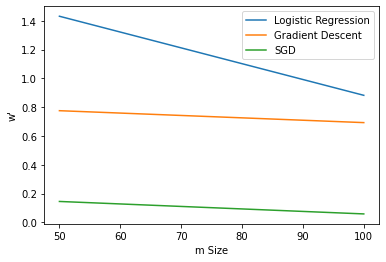

In [39]:
sns.lineplot(x=ms, y=lr_ws, label="Logistic Regression")
sns.lineplot(x=ms, y=gd_ws, label="Gradient Descent")
sns.lineplot(x=ms, y=sgd_ws, label="SGD").set(xlabel='m Size', ylabel='w\'');

# Problem 2

In [ ]:
from sklearn import datasets

In [ ]:
cancer = datasets.load_breast_cancer()

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.